In [1]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.simplefilter('ignore')

In [2]:
# Get the data

df = pd.read_csv("supermarket_sales - Sheet1.csv")
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
## Drop duplicates
df = df.drop_duplicates(keep= 'first')

## Check the shape 
df.shape

(1000, 17)

In [4]:
## Check the info 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 17 columns):
Invoice ID                 1000 non-null object
Branch                     1000 non-null object
City                       1000 non-null object
Customer type              1000 non-null object
Gender                     1000 non-null object
Product line               1000 non-null object
Unit price                 1000 non-null float64
Quantity                   1000 non-null int64
Tax 5%                     1000 non-null float64
Total                      1000 non-null float64
Date                       1000 non-null object
Time                       1000 non-null object
Payment                    1000 non-null object
cogs                       1000 non-null float64
gross margin percentage    1000 non-null float64
gross income               1000 non-null float64
Rating                     1000 non-null float64
dtypes: float64(7), int64(1), object(9)
memory usage: 140.6+ KB


In [5]:
## Find how many unique values
df.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

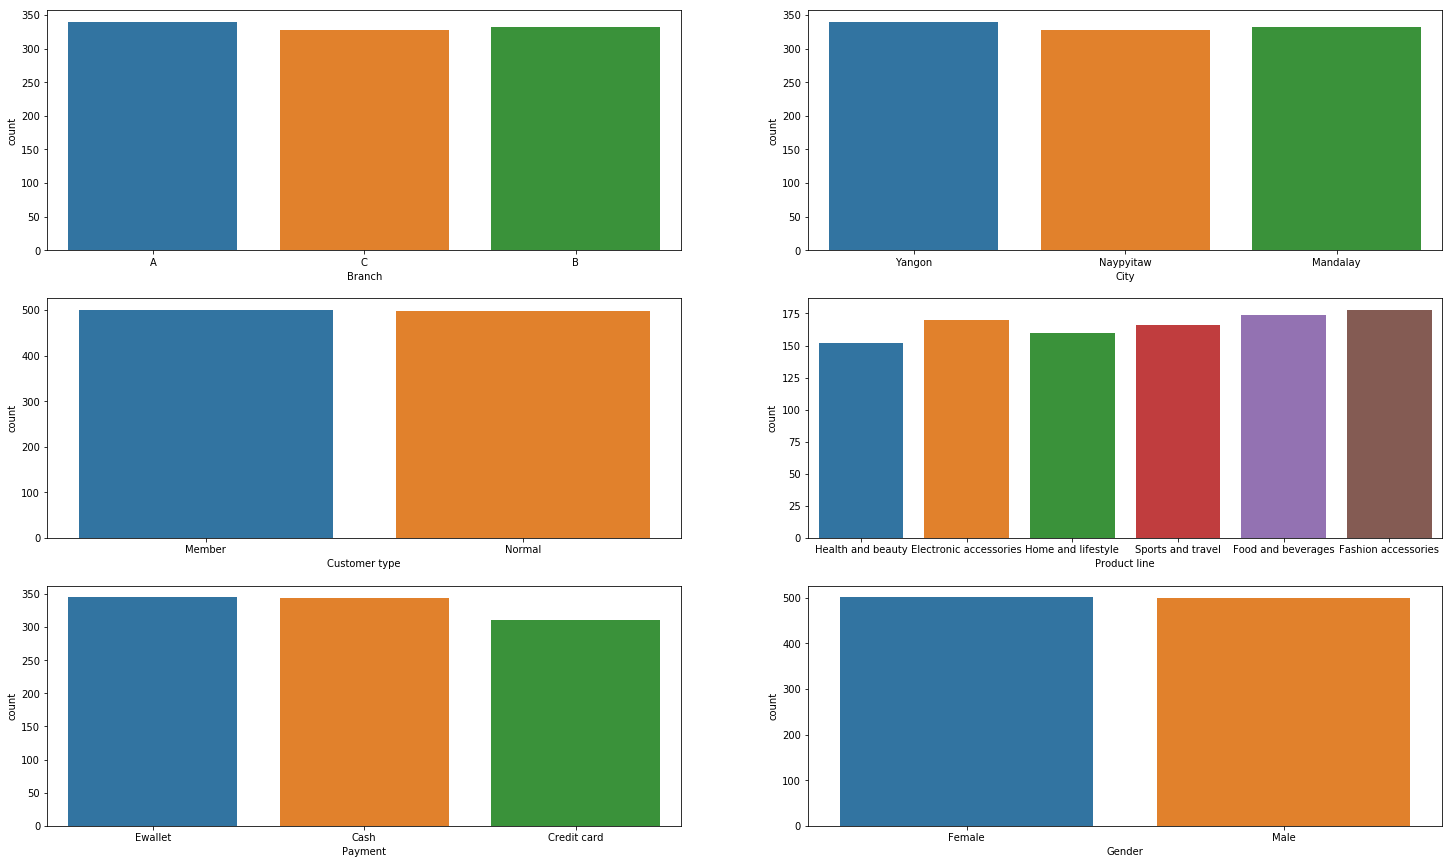

In [6]:
## Visual to see many count plots at once

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(25,15))
sns.countplot(df['Branch'], ax=ax[0,0])
sns.countplot(df['City'], ax=ax[0,1])
sns.countplot(df['Customer type'], ax=ax[1,0])
sns.countplot(df['Product line'], ax=ax[1,1])
sns.countplot(df['Payment'], ax=ax[2,0])
sns.countplot(df['Gender'], ax=ax[2,1])

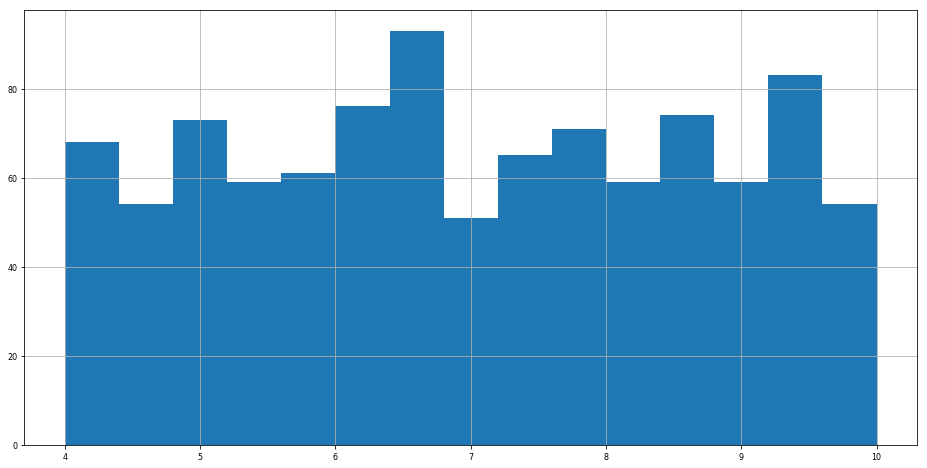

In [7]:
## Plot all the numerical variables at once
df['Rating'].hist(figsize=(16, 8), bins=15, xlabelsize=8, ylabelsize=8)

In [8]:
#Pre-Process Data

df['Gender'] = np.where(df['Gender']=='Male',1,0)
df['Customer type'] = np.where(df['Customer type']=='Member',1,0)

Brch = pd.get_dummies(df.Branch, prefix='Branch')
Pay = pd.get_dummies(df.Payment, prefix='Payment_Type')
ProductL = pd.get_dummies(df['Product line'], prefix='Product_line')
City = pd.get_dummies(df['City'], prefix='City_name')

df = pd.concat([df, Brch, Pay, ProductL, City], axis=1)

df.drop(['Branch', 'Payment','Invoice ID', 'Product line', 'City'], axis=1, inplace=True)

In [9]:
## Check the stats
df.describe()

,Customer type,Gender,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,...,Payment_Type_Ewallet,Product_line_Electronic accessories,Product_line_Fashion accessories,Product_line_Food and beverages,Product_line_Health and beauty,Product_line_Home and lifestyle,Product_line_Sports and travel,City_name_Mandalay,City_name_Naypyitaw,City_name_Yangon
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,0.501000,0.499000,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,...,0.345000,0.170000,0.178000,0.174000,0.152000,0.160000,0.166000,0.332000,0.32800,0.340000
std,0.500249,0.500249,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858,...,0.475606,0.375821,0.382704,0.379299,0.359201,0.366789,0.372267,0.471167,0.46972,0.473946
min,0.000000,0.000000,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,1.000000,0.000000,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,1.000000,1.000000,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000
max,1.000000,1.000000,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [10]:
## Find how many null values
df.isnull().sum()

Customer type                          0
Gender                                 0
Unit price                             0
Quantity                               0
Tax 5%                                 0
Total                                  0
Date                                   0
Time                                   0
cogs                                   0
gross margin percentage                0
gross income                           0
Rating                                 0
Branch_A                               0
Branch_B                               0
Branch_C                               0
Payment_Type_Cash                      0
Payment_Type_Credit card               0
Payment_Type_Ewallet                   0
Product_line_Electronic accessories    0
Product_line_Fashion accessories       0
Product_line_Food and beverages        0
Product_line_Health and beauty         0
Product_line_Home and lifestyle        0
Product_line_Sports and travel         0
City_name_Mandal

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 27 columns):
Customer type                          1000 non-null int32
Gender                                 1000 non-null int32
Unit price                             1000 non-null float64
Quantity                               1000 non-null int64
Tax 5%                                 1000 non-null float64
Total                                  1000 non-null float64
Date                                   1000 non-null object
Time                                   1000 non-null object
cogs                                   1000 non-null float64
gross margin percentage                1000 non-null float64
gross income                           1000 non-null float64
Rating                                 1000 non-null float64
Branch_A                               1000 non-null uint8
Branch_B                               1000 non-null uint8
Branch_C                               1000 non-null

In [12]:
## Only look for the columns with numbers
df_num = df.select_dtypes(include = ['float64', 'int64', 'int32', 'uint8'])

In [13]:
#Isolate the correlation between Rating and other variables 

correlation = df_num.drop('Rating', axis=1).apply(lambda x: x.corr(df_num.Rating))
print(correlation.sort_values(ascending=False))

Branch_C                               0.040740
City_name_Naypyitaw                    0.040740
Product_line_Food and beverages        0.037546
City_name_Yangon                       0.022714
Branch_A                               0.022714
Product_line_Fashion accessories       0.015310
Payment_Type_Credit card               0.011935
Product_line_Health and beauty         0.007540
Gender                                 0.004800
Payment_Type_Cash                     -0.001114
Unit price                            -0.008778
Payment_Type_Ewallet                  -0.010509
Product_line_Electronic accessories   -0.012645
Product_line_Sports and travel        -0.014658
Quantity                              -0.015815
Customer type                         -0.018889
Product_line_Home and lifestyle       -0.034351
cogs                                  -0.036442
Total                                 -0.036442
gross income                          -0.036442
Tax 5%                                -0

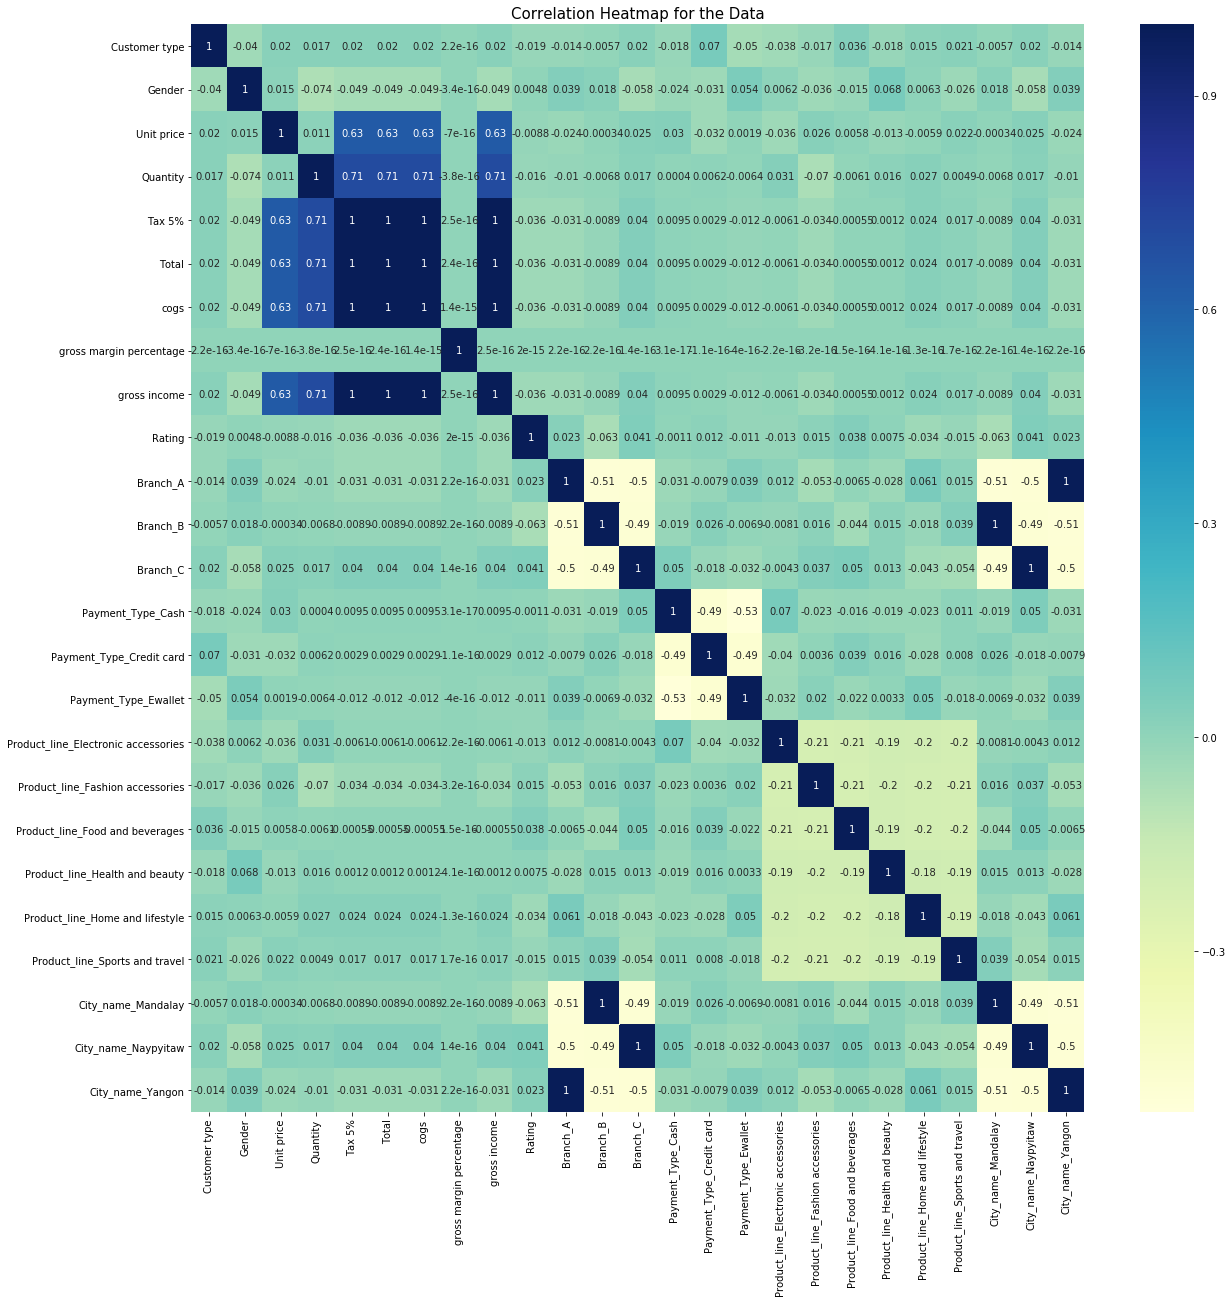

In [14]:
## Heat Map of correlations


fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(df_num.corr(), cmap = 'YlGnBu', annot = True, ax=ax)
plt.title('Correlation Heatmap for the Data', fontsize = 15)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_num, test_size=0.2)

y_train = train['Rating']
y_test = test['Rating']

X_train = train.drop(['Rating'], axis=1)
X_test = test.drop(['Rating'], axis=1)



In [16]:
# Machine learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 


# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    score = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    
    return train_pred, score



# Random Forest Regressor ----------------------------------------------------------------

train_pred_log, acc_rfor = fit_ml_algo(RandomForestRegressor(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)

# Linear Regression ---------------------------------------------------------------------

train_pred_log, acc_lin = fit_ml_algo(LinearRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)


# Decision Tree Regressor --------------------------------------------------------------------

train_pred_knn, acc_dtr = fit_ml_algo(DecisionTreeRegressor(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)


# Support Vector Regressor --------------------------------------------------------------------

train_pred_gaussian, acc_svr = fit_ml_algo(SVR(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)


Text(0.5, 0, 'Importance')

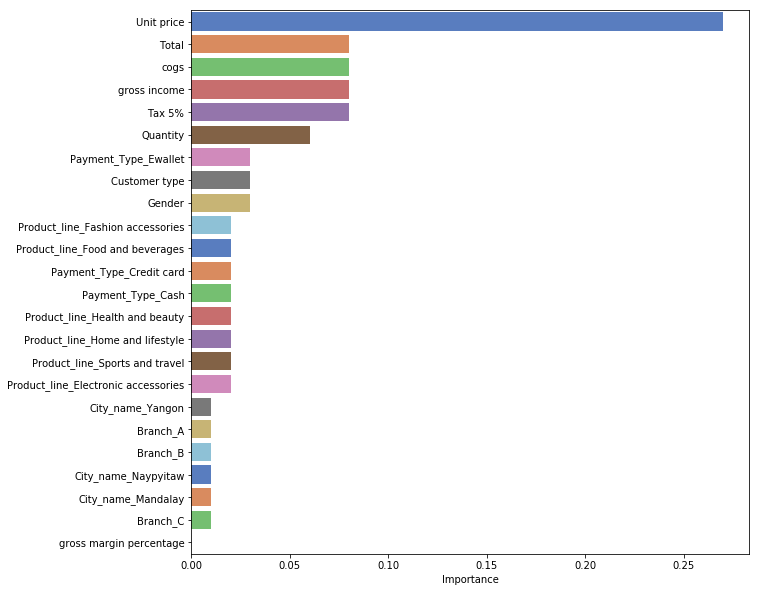

In [17]:
rfr = RandomForestRegressor(n_estimators=1000, random_state=0, n_jobs=-1)
rfr.fit(X_train, y_train)

f_im = rfr.feature_importances_.round(2)
rank = pd.Series(f_im, index=X_train.columns).sort_values(ascending=False)

figsize = [10.0, 10.0]

plt.figure(figsize=figsize)
sns.barplot(y=rank.index,x=rank.values,palette='muted')
plt.xlabel('Importance')

In [18]:
# Accuracy Scores --------------------------------------------------------------------------

models = pd.DataFrame({
    'Model': ['RandomForestRegressor', 'LinearRegression', 'DecisionTreeRegressor', 'SVR' ],
    'Score': [
        acc_rfor,
        acc_lin, 
        acc_dtr, 
        acc_svr
    ]})
print("---Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Accuracy Scores---


,Model,Score
2,DecisionTreeRegressor,100.00
0,RandomForestRegressor,78.29
3,SVR,57.43
1,LinearRegression,1.03


In [19]:
#Choose model

X_train.rename(columns={'gross income': 'gross_income','Unit price': 'Unit_price'}, inplace=True)

X_train = np.array(X_train[['Unit_price', 'gross_income', 'Quantity']])

y_train = np.array(y_train)

rfr = RandomForestRegressor()

model = rfr.fit(X_train, y_train)


# model score
print(round(model.score(X_train, y_train) * 100, 2))


76.58


In [20]:
## function to predict satisfaction rating

def satisfaction_rating(Unit_price, gross_income, Quantity):
    print("Satisfaction would be ", round(float(model.predict([[Unit_price, gross_income, Quantity]])),2))

#Predict test
          
satisfaction_rating(79, 55, 4)
print("The accuracy score is: ", round(model.score(X_train, y_train) * 100, 2),"%")

Satisfaction would be  6.48
The accuracy score is:  76.58 %
